# Plotting the Graphs for analyzing the stock prices using matplotib
* 11 Somesh Fengade
* 16 Zenil Gosher
* 24 Jayesh Jain

#### Importing the required lilbraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


#### Reading the data from csv files

## COMPOUND ANNUAL GROWTH RATES(CAGR) calculation
CAGR measures the mean growth rates of money or units / quantities of something over the years. This is a simple function in Python to calculate CAGR.
* references : https://feliperego.github.io/blog/2016/08/10/CAGR-Function-In-Python


In [2]:
def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1
data = pd.read_csv('../data/TANLA.NS.csv',parse_dates=['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-01,27.600000,40.799999,26.049999,37.950001,36.488186,9169052
1,2016-04-01,38.299999,42.549999,37.500000,37.700001,36.448353,5960656
2,2016-05-01,38.150002,40.500000,31.049999,34.400002,33.257915,8557257
3,2016-06-01,34.549999,42.000000,32.000000,37.250000,36.013294,6249072
4,2016-07-01,37.650002,39.500000,34.549999,36.349998,35.143173,3698927


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       61 non-null     datetime64[ns]
 1   Open       61 non-null     float64       
 2   High       61 non-null     float64       
 3   Low        61 non-null     float64       
 4   Close      61 non-null     float64       
 5   Adj Close  61 non-null     float64       
 6   Volume     61 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 3.5 KB


In [4]:
data['year'] = data['Date'].dt.year

### TANLA Platforms plotting the closing prices against year

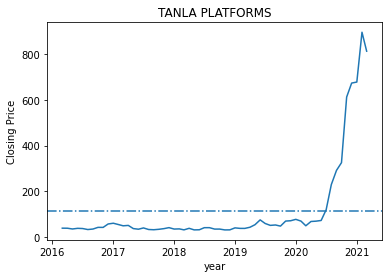

In [5]:
fig ,ax =plt.subplots()
ax.plot(data['Date'],data['Close'])
ax.axhline(y=data['Close'].mean(),linestyle='-.')
ax.set_title('TANLA PLATFORMS')
ax.set_xlabel('year')
ax.set_ylabel('Closing Price')
plt.show()

Text(0, 0.5, 'Volume x 10^7')

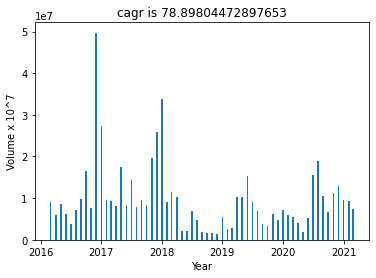

In [6]:
fig,ax = plt.subplots()

first,last = data[data.Date.dt.year==2016][:1].Close,data[data.Date.dt.year==2021][:1].Close
ax.bar(data['Date'],data['Volume'],width=10)
ax.set_title('cagr is ' +str(CAGR(int(first),int(last),periods=5)*100))
ax.set_xlabel('Year')
ax.set_ylabel('Volume x 10^7')

In [7]:

# print(CAGR(data[data.Date.dt.year==2016[:1]))

first,last = data[data.Date.dt.year==2016][:1].Close,data[data.Date.dt.year==2021][:1].Close
# print(first)|
periods = 5

percent = CAGR(int(first),int(last),periods)*100

print('The CAGR is ',CAGR(int(first),int(last),periods)*100)


The CAGR is  78.89804472897653


## Plotting the annual growth percentage

[57.971012965190695, -41.94631013242652, 14.684288243297747, 94.26751592356688, 785.9008038094205]


Text(0, 0.5, 'YEAR')

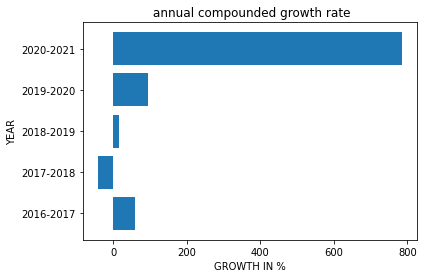

In [8]:
def annual_compounded_growth_rate(startyear):
    first,last = data[data.Date.dt.year==startyear][:1].Close,data[data.Date.dt.year==startyear+1][:1].Close
    difference = int(last) - int(first)
    percentage= (difference/first)*100
    return float(percentage)

z = []
for x in range(2016,2021):
    z.append(annual_compounded_growth_rate(x))

print(z)

fig,ax = plt.subplots()
ax.barh(['2016-2017','2017-2018','2018-2019','2019-2020','2020-2021'],z)
ax.set_title(" annual compounded growth rate")
ax.set_xlabel('GROWTH IN %')
ax.set_ylabel('YEAR')




## Importing the another data (Neuland labs) 

In [9]:
anotherdata = pd.read_csv('../data/another_data.csv',parse_dates=['Date'])

In [10]:
anotherdata.head()
# neuland labs 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-01,518.650024,737.299988,518.650024,703.549988,696.195190,378905
1,2016-04-01,709.000000,779.700012,698.000000,750.900024,743.050232,131523
2,2016-05-01,743.000000,903.900024,675.250000,801.000000,792.626465,845762
3,2016-06-01,800.000000,908.799988,775.000000,864.450012,855.413147,708202
4,2016-07-01,872.150024,1044.000000,865.000000,915.500000,905.929504,909421


In [11]:
anotherdata.value_counts()

Date        Open         High         Low          Close        Adj Close    Volume 
2021-03-01  2088.000000  2149.399902  1865.250000  2089.199951  2089.199951  965642     1
2018-08-01  701.849976   800.000000   651.000000   779.750000   773.342834   525351     1
2018-06-01  711.549988   745.000000   630.000000   640.400024   635.137878   163419     1
2018-05-01  710.299988   829.299988   691.099976   707.900024   702.083313   478099     1
2018-04-01  718.950012   786.000000   696.450012   710.299988   704.463440   289942     1
                                                                                       ..
2019-02-01  532.500000   827.299988   473.600006   762.750000   756.482605   2055614    1
2019-01-01  458.899994   581.400024   458.100006   532.500000   528.124512   162668     1
2018-12-01  478.000000   485.899994   425.000000   458.350006   454.583771   153657     1
2018-11-01  580.000000   594.700012   475.200012   479.250000   475.312012   514343     1
2016-03-01  518

## Plotting the closing prices against date

Text(0, 0.5, 'closing price')

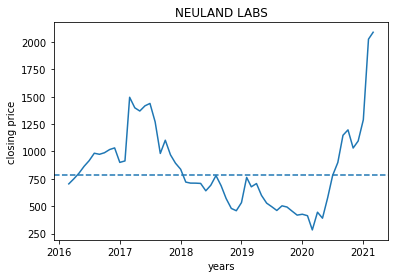

In [12]:
fig,ax = plt.subplots()
ax.plot(anotherdata['Date'],anotherdata['Close'])
ax.axhline(y=anotherdata['Close'][:50].mean(),linestyle='--')
ax.set_title('NEULAND LABS')
ax.set_xlabel('years')
ax.set_ylabel('closing price')

## plotting the volume against the date 

Text(0, 0.5, 'VOLUME X 1^6')

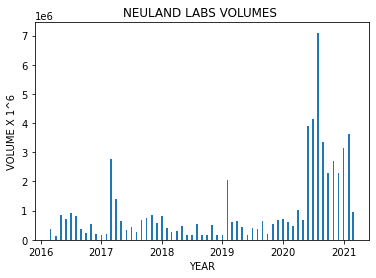

In [13]:
fig,ax = plt.subplots()
ax.bar(anotherdata['Date'],anotherdata['Volume'],width=10)
ax.set_title("NEULAND LABS VOLUMES ")
ax.set_xlabel('YEAR')
ax.set_ylabel('VOLUME X 1^6')

## plotting the growth percentages of the NEULAND LABS

[27.85871698430048, -6.889654222300587, -36.42225833038667, -19.906103286384976, 202.51085583729935]


Text(0, 0.5, 'YEAR')

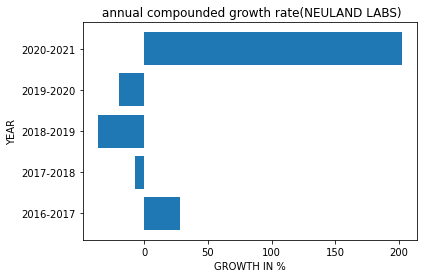

In [14]:
def second(startyear):
    first,last = anotherdata[anotherdata.Date.dt.year==startyear][:1].Close,anotherdata[anotherdata.Date.dt.year==startyear+1][:1].Close
    difference = int(last) - int(first)
    percentage= (difference/first)*100
    return float(percentage)

z = []
for x in range(2016,2021):
    z.append(second(x))

print(z)

fig,ax = plt.subplots()
ax.barh(['2016-2017','2017-2018','2018-2019','2019-2020','2020-2021'],z)
ax.set_title(" annual compounded growth rate(NEULAND LABS)")
ax.set_xlabel('GROWTH IN %')
ax.set_ylabel('YEAR')





# THANK YOU !
